# OSM

In [1]:
# https://wiki.openstreetmap.org/wiki/Key:amenity

###  Overpass Turbo API

In [2]:
# https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_API_by_Example
# for the amenities

In [3]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];

area[admin_level=5]["name"="Greater London"]->.searchArea;
(
  node(area.searchArea)["amenity"="cafe"];
  node(area.searchArea)["amenity"="bar"];
  node(area.searchArea)["amenity"="pub"];
  );
out body;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [4]:
data.keys()

dict_keys(['version', 'generator', 'osm3s', 'elements'])

In [5]:
import pandas as pd

In [6]:
osm_df = pd.DataFrame(data['elements'])

In [7]:
from pandas.io.json import json_normalize 
osm_df = json_normalize(data, 'elements')

In [8]:
osm_df.head()

id        lat       lon  \
0    108042  51.523536 -0.135529   
1    451152  51.600840 -0.194608   
2    451154  51.599586 -0.196005   
3    451271  51.614104 -0.176505   
4  12242503  51.592016  0.027962   

                                                tags  type  
0  {'addr:housenumber': '31', 'addr:postcode': 'W...  node  
1  {'addr:city': 'London', 'addr:housenumber': '3...  node  
2  {'addr:housenumber': '319', 'addr:street': 'Re...  node  
3  {'addr:city': 'London', 'addr:housenumber': '7...  node  
4  {'amenity': 'pub', 'name': 'Railway Bell', 're...  node

In [9]:
osm_df['amenity'] = osm_df['tags'].map(lambda x: x['amenity'])
# or
# for index, row in osm_df.iterrows():
#     osm_df.loc[index,'tags'] = osm_df.loc[index,'tags']['amenity']

In [10]:
osm_df.head()

id        lat       lon  \
0    108042  51.523536 -0.135529   
1    451152  51.600840 -0.194608   
2    451154  51.599586 -0.196005   
3    451271  51.614104 -0.176505   
4  12242503  51.592016  0.027962   

                                                tags  type amenity  
0  {'addr:housenumber': '31', 'addr:postcode': 'W...  node     pub  
1  {'addr:city': 'London', 'addr:housenumber': '3...  node     pub  
2  {'addr:housenumber': '319', 'addr:street': 'Re...  node     pub  
3  {'addr:city': 'London', 'addr:housenumber': '7...  node     pub  
4  {'amenity': 'pub', 'name': 'Railway Bell', 're...  node     pub

In [11]:
len(osm_df)

5485

###  GeoFabrik.de

http://download.geofabrik.de/

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import Polygon

In [2]:
pwd

'/home/lefteris/Desktop/trajectories/OSM_and_GeoIndex/test'

In [3]:
osm_shp = gpd.read_file('/home/lefteris/Desktop/trajectories/OSM_and_GeoIndex/data/OSM geofabrik/gis_osm_pois_free_1.shp')
osm_shp.crs = {'init' :'epsg:4326'}
osm_shp.rename(columns={'fclass':'amenity'},inplace=True)

In [4]:
len(osm_shp)

55114

In [5]:
osm_shp.head()

osm_id  code         amenity                name  \
0  108042  2304             pub             Simmons   
1  108539  2566  bicycle_rental     Windsor Terrace   
2  283885  2204            park        Ecology Park   
3  451152  2304             pub         The Dignity   
4  451153  2301      restaurant  Central Restaurant   

                                  geometry  
0            POINT (-0.1355294 51.5235359)  
1  POINT (-0.09338780000000001 51.5291251)  
2              POINT (0.0155831 51.494974)  
3            POINT (-0.1946078 51.6008404)  
4            POINT (-0.1935029 51.6020306)

In [6]:
# # single core

osm_shp['lat'] = osm_shp['geometry'].apply(lambda x: x.y)
osm_shp['lon'] = osm_shp['geometry'].apply(lambda x: x.x)

# for index, row in osm_shp.iterrows():
#     osm_shp.loc[index,'lon'] = row['geometry'].x
#     osm_shp.loc[index,'lat'] = row['geometry'].y
# or 
# for i in range(len(osm_shp)):
#     osm_shp.loc[i,'lon'] = osm_shp.loc[i,'geometry'].x
#     osm_shp.loc[i,'lat'] = osm_shp.loc[i,'geometry'].y

In [7]:
osm_shp.head()

osm_id  code         amenity                name  \
0  108042  2304             pub             Simmons   
1  108539  2566  bicycle_rental     Windsor Terrace   
2  283885  2204            park        Ecology Park   
3  451152  2304             pub         The Dignity   
4  451153  2301      restaurant  Central Restaurant   

                                  geometry        lat       lon  
0            POINT (-0.1355294 51.5235359)  51.523536 -0.135529  
1  POINT (-0.09338780000000001 51.5291251)  51.529125 -0.093388  
2              POINT (0.0155831 51.494974)  51.494974  0.015583  
3            POINT (-0.1946078 51.6008404)  51.600840 -0.194608  
4            POINT (-0.1935029 51.6020306)  51.602031 -0.193503

## Visualisation

### Folium

In [8]:
import folium
from folium.plugins import MarkerCluster

map_osm = folium.Map(location=[51.509091, -0.124038], zoom_start=11)

marker_cluster = MarkerCluster().add_to(map_osm)

In [9]:
# it will be removed
# osm_data = osm_df.as_matrix(columns=["lon","lat"])
# or
#osm_data = osm_df.loc[:,["lat","lon"]].values
# or
locations = osm_shp[["lat","lon"]]
locationlist = locations.values.tolist()

In [10]:
for point in range(0, len(locationlist[:500])):
    folium.Marker(locationlist[point], popup=osm_shp['amenity'][point]).add_to(marker_cluster)

In [11]:
# for i in osm_data[:100]:
#     folium.Marker(location = i).add_to(map_osm)
# folium.Marker(location = osm_data[0]).add_to(map_osm)

In [13]:
map_osm#.save('osm_leaflet.html')

## H3

In [14]:
from h3 import h3

In [15]:
# import
# from __future__ import division
import warnings
warnings.filterwarnings('ignore')

#import pandas as pd
import shapely
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import mapping
import base64
import urllib
import tempfile
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Functions
def plot_scatter(df, metric_col, x='lon', y='lat', marker='.', alpha=1, figsize=(16,12), colormap='viridis'):    
    df.plot.scatter(x=x, y=y, c=metric_col, title=metric_col
                    , edgecolors='none', colormap=colormap, marker=marker, alpha=alpha, figsize=figsize);
    plt.xticks([], []); plt.yticks([], [])
    
    
def kring_smoothing(df, hex_col, metric_col, k):
    dfk = df[[hex_col]] 
    dfk.index = dfk[hex_col]
    dfs =  (dfk[hex_col]
                 .apply(lambda x: pd.Series(list(h3.k_ring(x,k)))).stack()
                 .to_frame('hexk').reset_index(1, drop=True).reset_index()
                 .merge(df[[hex_col,metric_col]]).fillna(0)
                 .groupby(['hexk'])[[metric_col]].sum().divide((1 + 3 * k * (k + 1)))
                 .reset_index()
                 .rename(index=str, columns={"hexk": hex_col}))
    dfs['lat'] = dfs[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    dfs['lon'] = dfs[hex_col].apply(lambda x: h3.h3_to_geo(x)[1]) 
    return dfs

In [16]:
# # Visualize the OSM points
# osm_shp.plot(x='lon',y='lat',style='.',alpha=1,figsize=(6,6))
# plt.title('OSM points across London')

### OSM Points to Hex

In [17]:
hex_osm = osm_shp.copy()

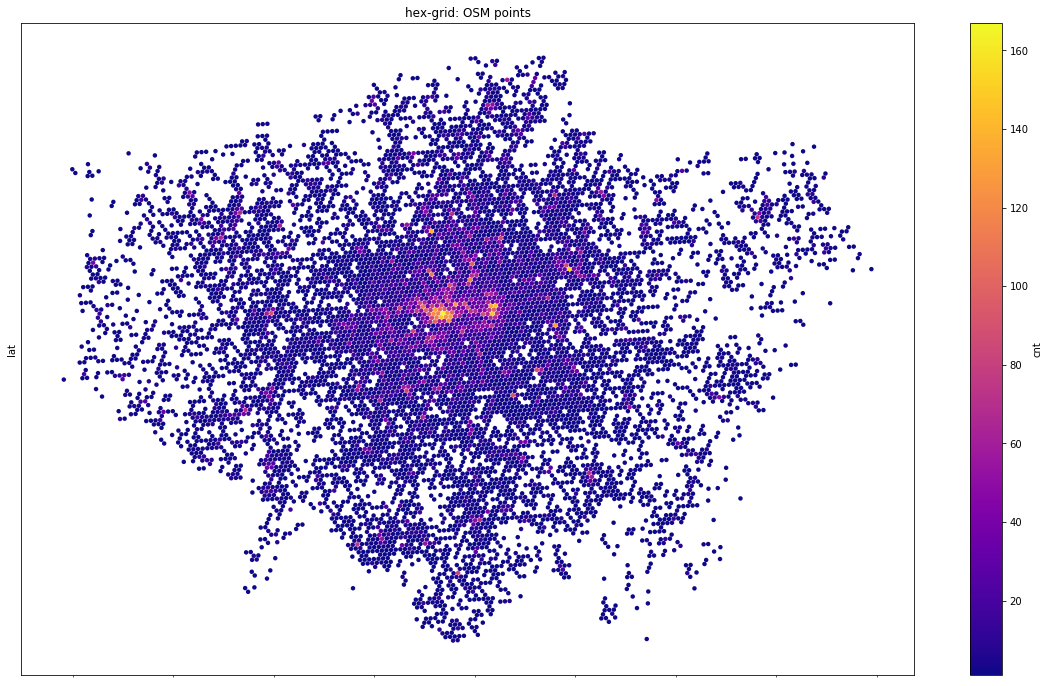

In [18]:
APERTURE_SIZE = 9
hex_col = 'hex'+str(APERTURE_SIZE)

# find hexs containing the points
hex_osm[hex_col] = hex_osm.apply(lambda x: h3.geo_to_h3(x.lat,x.lon,APERTURE_SIZE),axis=1)

# aggregate the points
hex_osm_g = hex_osm.groupby(hex_col).size().to_frame('cnt').reset_index()

#find center of hex for visualization
hex_osm_g['lat'] = hex_osm_g[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
hex_osm_g['lon'] = hex_osm_g[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])

# pltot the hexs
plot_scatter(hex_osm_g, metric_col='cnt', marker='o',figsize=(20,12),colormap='plasma')
plt.title('hex-grid: OSM points');

In [19]:
hex_osm_g.sort_values(by='cnt', ascending=False).head()

hex9  cnt        lat       lon
6331  89195da4987ffff  167  51.512869 -0.131628
5064  89194e699c3ffff  153  51.542453 -0.005897
6343  89195da49bbffff  148  51.510142 -0.133285
2214  89194ad300bffff  146  51.512481 -0.082506
2255  89194ad30c7ffff  143  51.517933 -0.079187

sum sanity check: 1.0


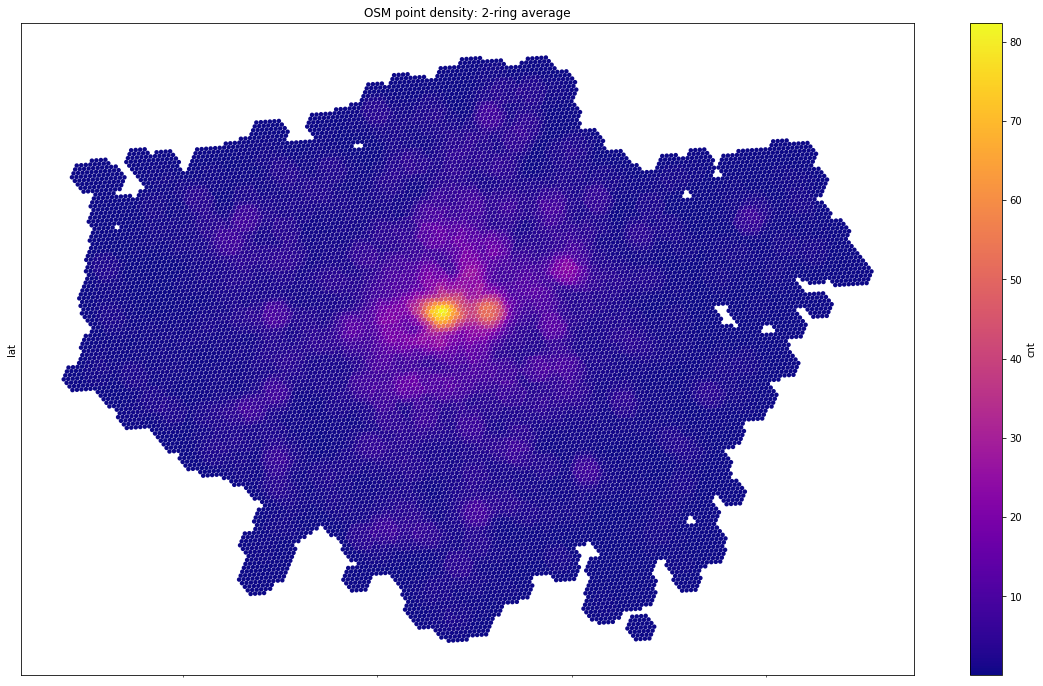

In [20]:
#kring_smoothing
k = 3
hex_osm_s= kring_smoothing(hex_osm_g, hex_col, metric_col='cnt', k=k)
print('sum sanity check:', hex_osm_s['cnt'].sum() / hex_osm_g['cnt'].sum() )
plot_scatter(hex_osm_s, metric_col='cnt',figsize=(20,12), marker='o',colormap='plasma')
plt.title('OSM point density: 2-ring average');

### Get all hex within the boundary

Get all hexagons for London that dont have any counts

In [21]:
gr_london_link = 'https://data.cdrc.ac.uk/dataset/2861ceb1-8cba-45fc-b88e-bdfc6ca7db5b/resource/62088a4d-fbde-4163-8bdb-6d94fe0fb8e2/download/greaterlondon.json'
boundary_london=gpd.GeoDataFrame.from_file(gr_london_link)
boundary_geoJson = boundary_london.geometry[0].__geo_interface__
all_hexagons = hexagons = list(h3.polyfill(boundary_geoJson, APERTURE_SIZE,geo_json_conformant=True))
all_hexagons_dict = {hex_col:all_hexagons}

In [22]:
all_hexagons_df = pd.DataFrame(all_hexagons_dict, columns=hex_osm_g.columns.tolist())

In [23]:
len(all_hexagons_df)

16890

In [24]:
all_hexagons_df['cnt'] = 0

In [25]:
all_hexagons_df.head()

hex9  cnt  lat  lon
0  89194ad1467ffff    0  NaN  NaN
1  89194e6c223ffff    0  NaN  NaN
2  89195da45d3ffff    0  NaN  NaN
3  89194ad98a7ffff    0  NaN  NaN
4  89194e6e257ffff    0  NaN  NaN

In [26]:
# merge them only where there is no values in gdf_hex_osm_g
df_all_hex = pd.merge(hex_osm_g, all_hexagons_df, how='right', on=hex_col)

In [27]:
# # add 0 to the hexagons that dont have any cnt value
# index_values_cnty0 = df_all_hex[df_all_hex.cnt_x.isna()].index.values
# df_all_hex.loc[index_values_cnty0,'cnt_x']=0
# OR
df_all_hex.fillna(0,inplace=True)

In [28]:
df_all_hex.drop(["cnt_y","lat_y","lon_y"], axis=1, inplace=True)

In [29]:
df_all_hex.head()

hex9  cnt_x      lat_x     lon_x
0  89194ac0007ffff    6.0  51.322108 -0.126339
1  89194ac000bffff    2.0  51.324406 -0.133891
2  89194ac001bffff    2.0  51.327139 -0.132239
3  89194ac0027ffff    1.0  51.314343 -0.122094
4  89194ac002bffff    1.0  51.316641 -0.129644

In [30]:
df_all_hex.describe()

cnt_x         lat_x         lon_x
count  16890.000000  16890.000000  16890.000000
mean       3.257134     25.478115     -0.061820
std        9.380441     25.748879      0.124171
min        0.000000      0.000000     -0.508666
25%        0.000000      0.000000     -0.118162
50%        0.000000      0.000000      0.000000
75%        2.000000     51.500643      0.000000
max      167.000000     51.683845      0.294611

In [31]:
from shapely import geometry
df_all_hex['geometry'] = df_all_hex[hex_col].apply(lambda x: geometry.Polygon(h3.h3_to_geo_boundary(x, geo_json=True)))

# hex_osm_g['geometry'] = 0
# for index, row in hex_osm_g.iterrows():
#     hex_osm_g.loc[index,'geometry'] = geometry.Polygon(h3.h3_to_geo_boundary(hex_osm_g.loc[index,hex_col], geo_json=True))

In [32]:
df_all_hex.head()

hex9  cnt_x      lat_x     lon_x  \
0  89194ac0007ffff    6.0  51.322108 -0.126339   
1  89194ac000bffff    2.0  51.324406 -0.133891   
2  89194ac001bffff    2.0  51.327139 -0.132239   
3  89194ac0027ffff    1.0  51.314343 -0.122094   
4  89194ac002bffff    1.0  51.316641 -0.129644   

                                            geometry  
0  POLYGON ((-0.1267717869416692 51.3238574587284...  
1  POLYGON ((-0.1343235898122116 51.3261555256425...  
2  POLYGON ((-0.1326712340835003 51.3288887247497...  
3  POLYGON ((-0.1225261332552508 51.3160927229987...  
4  POLYGON ((-0.1300764687368827 51.3183909248131...

In [33]:
df_all_hex.sort_values(by='cnt_x', ascending=False).head()

hex9  cnt_x      lat_x     lon_x  \
6289  89195da4987ffff  167.0  51.512869 -0.131628   
5034  89194e699c3ffff  153.0  51.542453 -0.005897   
6301  89195da49bbffff  148.0  51.510142 -0.133285   
2198  89194ad300bffff  146.0  51.512481 -0.082506   
2239  89194ad30c7ffff  143.0  51.517933 -0.079187   

                                               geometry  
6289  POLYGON ((-0.1320616695487331 51.5146163544330...  
5034  POLYGON ((-0.006326337148278612 51.54419928585...  
6301  POLYGON ((-0.1337194130512571 51.5118889735921...  
2198  POLYGON ((-0.08293868490551422 51.514227447318...  
2239  POLYGON ((-0.07961952717211604 51.519679311583...

In [34]:
gdf_all_hex = gpd.GeoDataFrame(df_all_hex, geometry='geometry', crs={'init': 'epsg:4326'})

In [35]:
gdf_all_hex.head()

hex9  cnt_x      lat_x     lon_x  \
0  89194ac0007ffff    6.0  51.322108 -0.126339   
1  89194ac000bffff    2.0  51.324406 -0.133891   
2  89194ac001bffff    2.0  51.327139 -0.132239   
3  89194ac0027ffff    1.0  51.314343 -0.122094   
4  89194ac002bffff    1.0  51.316641 -0.129644   

                                            geometry  
0  POLYGON ((-0.1267717869416692 51.3238574587284...  
1  POLYGON ((-0.1343235898122116 51.3261555256425...  
2  POLYGON ((-0.1326712340835003 51.3288887247497...  
3  POLYGON ((-0.1225261332552508 51.3160927229987...  
4  POLYGON ((-0.1300764687368827 51.3183909248131...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59fc4f8518>]],
      dtype=object)

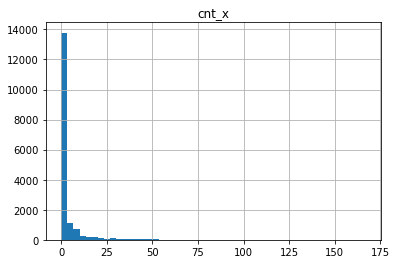

In [36]:
gdf_all_hex.hist(column='cnt_x',bins=50)

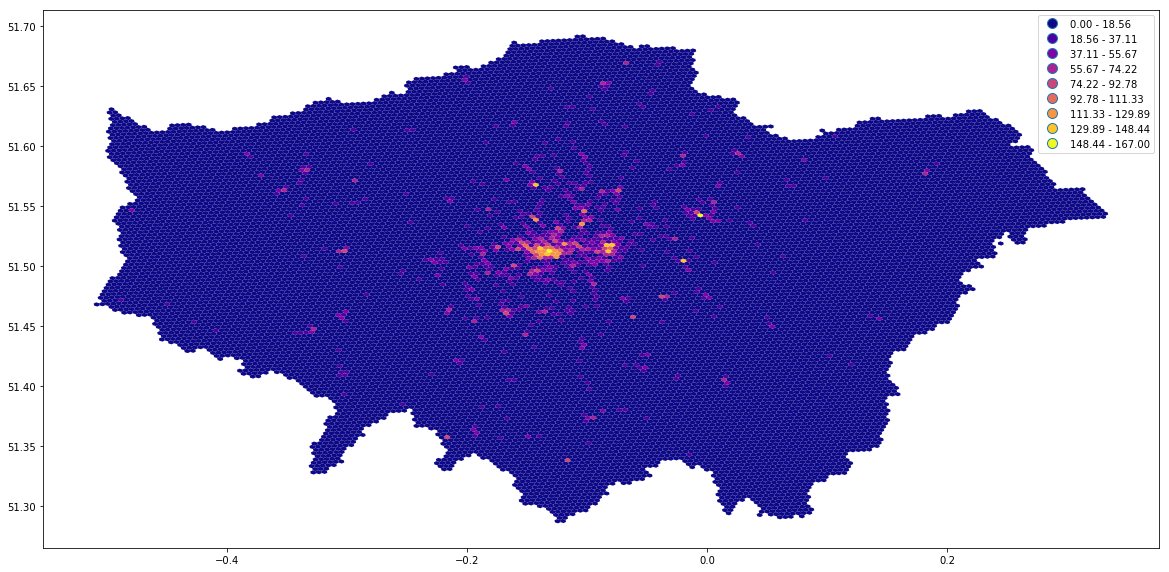

In [37]:
#https://github.com/pysal/mapclassify
scheme = 'equal_interval'
colors = 9
cmap = 'plasma'
figsize = (20,12)
gdf_all_hex.plot(column='cnt_x', cmap=cmap, figsize=figsize, scheme=scheme, k=colors, legend=True)

### Chloropleth from hex 

In [38]:
import branca

#https://stackoverflow.com/questions/47846744/create-an-asymmetric-colormap
import branca.colormap as cm
# colormap = cm.LinearColormap(colors=['red','blue'], index=[-200,0],vmin=-200,vmax=1200)

#https://python-visualization.github.io/folium/quickstart.html
from branca.colormap import linear
#https://github.com/python-visualization/branca/blob/master/branca/_schemes.json
colormap = linear.YlOrRd_03.scale(
    gdf_all_hex.cnt_x.min(),
    gdf_all_hex.cnt_x.max())

#colormap = cm.LinearColormap(colors=['red','lightblue','blue'], index=[gdf_all_hex.cnt_x.min(),2,gdf_all_hex.cnt_x.max()],vmin=gdf_all_hex.cnt_x.min(),vmax=gdf_all_hex.cnt_x.max())

osm_cnt_series = gdf_all_hex.set_index('hex9')['cnt_x']

def style_function(feature):
    count = osm_cnt_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 2,
        'color':'#black' if count is None else colormap(count),
        'opacity':1,
        'fillColor': '#black' if count is None else colormap(count)
    }

In [41]:
m = folium.Map(
    location=[51.509091, -0.124038],
    tiles='cartodbpositron',
    zoom_start=10
)

folium.GeoJson(
    gdf_all_hex[:300].__geo_interface__,
    name='geojson',
    style_function=style_function
).add_to(m)


folium.LayerControl().add_to(m)

m#.save('OSM_density_leaflet.html')

In [39]:
# convert geodataframe to json
#gdf_all_hex[:10].__geo_interface__
# or 
# gdf_all_hex.geometry.to_json()
# or save it as a json file and open it
# gdf_all_hex.to_file("my_geojson_file.json", driver = "GeoJSON")
# open_json = os.path.join('my_geojson_file.json')

### Load Census UK Data 

In [81]:
# http://ukdataexplorer.com/census/london/

#https://data.london.gov.uk/dataset/ward-profiles-and-atlas
ct_data_link = "/home/lefteris/Desktop/trajectories/data/Census/population_density_wards_2011_census.csv"
#https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london
ct_shape_link = '/home/lefteris/Desktop/trajectories/data/Census/statistical-gis-boundaries-london/ESRI/London_Ward_2011_new.shp'

Text(0.5, 1.0, 'Census 2011: Ward Population Density')

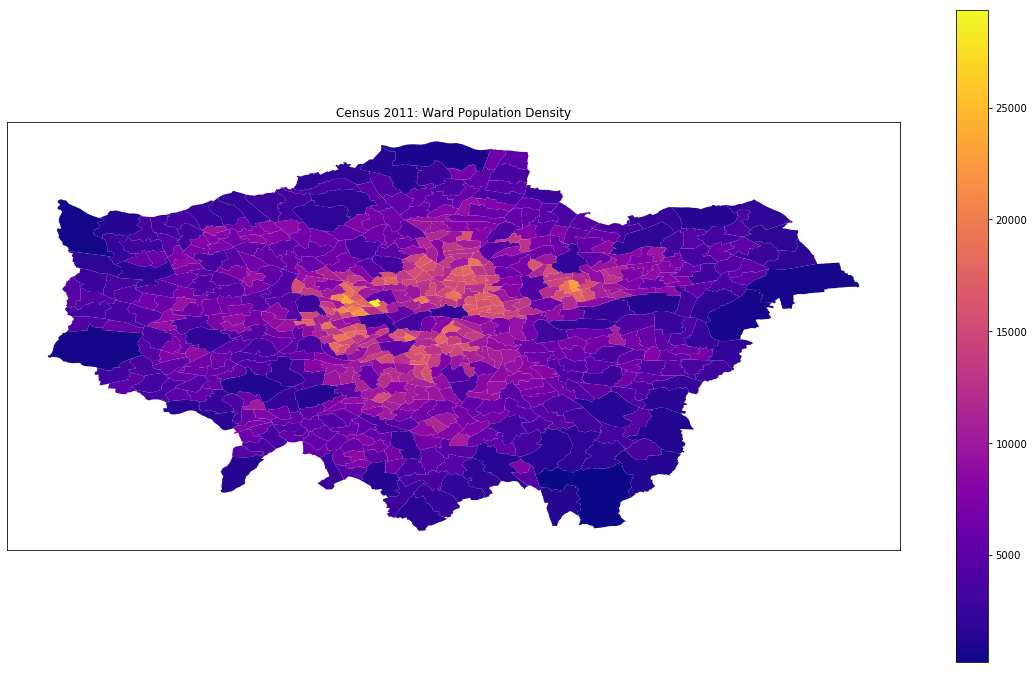

In [85]:
METRIC_COL = 'Population density km' #population density

# Load Ward ShapeFile
gdf=GeoDataFrame.from_file(ct_shape_link)
gdf.rename(columns={'geo_code':'New Code'},inplace=True)
gdf['New Code'] = gdf['New Code'].astype(str) 

# Load Ward Population Density
df = pd.read_csv(ct_data_link, usecols=['New Code','Population density km'])
df['New Code'] = df['New Code'].astype(str)

# join metadata
newdf = df.merge(gdf).fillna(0)
gdf = gpd.GeoDataFrame(newdf, geometry='geometry', crs = {"init": "epsg:4326"})

# Visualize Population Density per Census Tract
f, ax = plt.subplots(figsize=(20,12))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
gdf.plot(column=METRIC_COL,colormap='plasma',alpha=1,linewidth=0.05,ax=ax, legend=True)
plt.title('Census 2011: Ward Population Density')

### Census to H3 

In [87]:
from shapely.ops import cascaded_union

In [88]:
# union_poly.geometry

Sanity Check
number of hexes: 118161
number of duplicates: 0


Text(0.5, 1.0, 'hex-grid: population density')

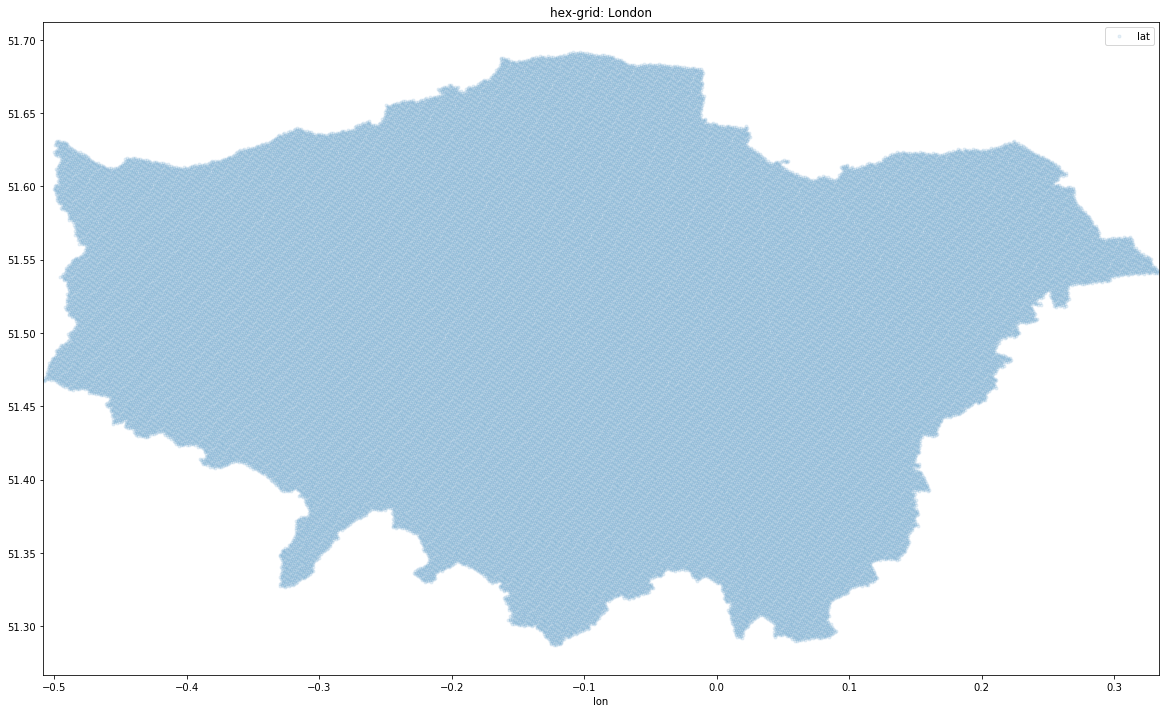

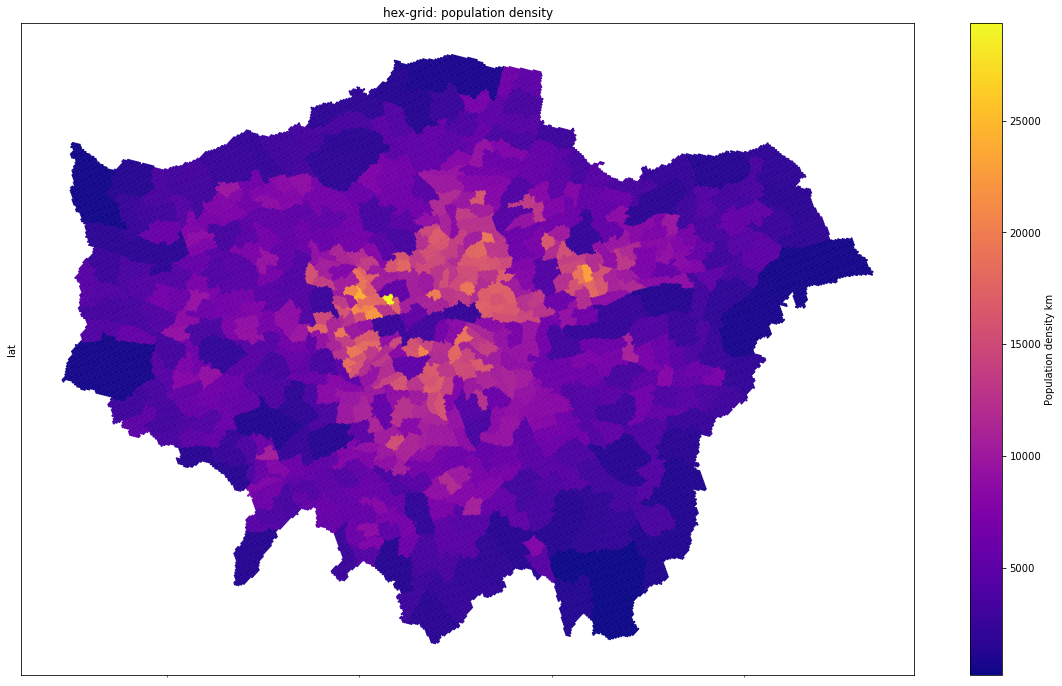

In [126]:
APERTURE_SIZE = 10

# # Unify the Ward boundaries
union_poly = cascaded_union(gdf.geometry)
union_poly_gdf = gpd.GeoDataFrame(gpd.GeoSeries(union_poly))
union_poly_gdf = union_poly_gdf.rename(columns={0:'geometry'}).set_geometry('geometry')
union_poly_gdf_json = union_poly_gdf.geometry[0].__geo_interface__

#Find the hexs within the city boundary using PolyFill
hex_list= list(h3.polyfill(union_poly_gdf_json, APERTURE_SIZE, geo_json_conformant=True))

# create hex dataframe
hex_col = 'hex{}'.format(APERTURE_SIZE)
dfh = pd.DataFrame(hex_list,columns=[hex_col])
print('Sanity Check\nnumber of hexes:', len(hex_list))
print('number of duplicates:', len(hex_list) - len(dfh.drop_duplicates()))

# add lat & lon of center of hex 
dfh['lat']=dfh[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
dfh['lon']=dfh[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])

# create Point object based on hex latlng
dfh['geometry'] = dfh.apply(lambda x: shapely.geometry.Point(x.lon,x.lat),1)
dfh.crs = {"init": "epsg:4326"}

# plot hex latlng
dfh.plot(x='lon',y='lat',style='.',alpha=.1,figsize=(20,12));
plt.title('hex-grid: London')

# Intersect Hex Point with CT Polygon
gdf_ct = gpd.tools.sjoin(gdf, dfh, how="inner")
#gdf_ct.sample(3)

# convert the geodataframe to dataframe
df_ct = pd.DataFrame(gdf_ct)

# Visualize Hexagons
plot_scatter(df_ct, metric_col=METRIC_COL, figsize=(20,12), marker='.',colormap='plasma')
plt.title('hex-grid: population density')

# Appendix

#### Get boundary of Great London from OSM

In [ ]:
# import requests
# import json
# overpass_url = "http://overpass-api.de/api/interpreter"
# overpass_query = """
# [out:json];
# (relation(175342);
# <;
# );
# out geom;
# """
# response = requests.get(overpass_url, 
#                         params={'data': overpass_query})
# data = response.json()

In [ ]:
# import pandas as pd
# from pandas.io.json import json_normalize 
# london_df = json_normalize(data, 'elements')
# london_df

In [ ]:
# boundary_json = []

# def add_to_empty(x):
#     lat_list = []
#     lon_list = []
#     lat_list.append(x['lat'])
#     lon_list.append(x['lon'])
#     return [list(a) for a in zip(lat_list, lon_list)][0]

In [ ]:
# for i in data['elements'][0]['members']:
#     try:
#         boundary_json.append(list(map(add_to_empty,(i['geometry']))))
#     except:
#         print(i)
#         #pass

In [ ]:
# boundary_json